In [156]:
# 1. Import Cleaned Data for Analysis
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1.1 Load the cleaned data from CSV file
data_cleaned = pd.read_csv('data_cleaned.csv', index_col=[0, 1])

# Display the first few rows of the data to ensure it has loaded correctly
data_cleaned.head(30)

1992  \
Country                                                             
Albania Economics: GDP                               6.521750e+08   
        Economics: GDP Growth                       -7.187111e+00   
        Economics: GDP Per Capita                    2.008522e+02   
        Economics: GDP Per Capita Growth            -6.622551e+00   
        Economics: PPP                               5.917192e+09   
        Economics: PPP Growth                       -5.071988e+00   
        Economics: PPP Per Capita                    1.822335e+03   
        Economics: PPP Per Capita Growth            -4.494563e+00   
        Electricity: Distribution Losses             1.411000e+00   
        Electricity: Distribution Losses Growth      1.040689e+01   
        Electricity: Distribution Losses Per Capita  4.345498e-07   
        Electricity: Exports                         5.600000e-01   
        Electricity: Exports Growth                 -5.685670e+01   
        Electricity: Exports Per Capita              1.724648e-07   
        Electricity: Imports                         1.040000e-01   
        Electricity: Imports Growth                 -8.400000e+01   
        Electricity: Imports Per Capita              3.202918e-08   
        Electricity: Installed Capacity              1.892000e+00   
        Electricity: Installed Capacity Growth       0.000000e+00   
        Electricity: Installed Capacity Per Capita   5.826847e-07   
        Electricity: Net Consumption                 1.443000e+00   
        Electricity: Net Consumption Growth         -1.586006e+01   
        Electricity: Net Consumption Per Capita      4.444049e-07   
        Electricity: Net Generation                  3.310000e+00   
        Electricity: Net Generation Growth          -9.090909e+00   
        Electricity: Net Generation Per Capita       1.019390e-06   
        Electricity: Net Imports                    -4.560000e-01   
        Electricity: Net Imports Growth             -2.962963e+01   
        Electricity: Net Imports Per Capita         -1.404356e-07   
Algeria Economics: GDP                               4.800308e+10   

                                                             1993  \
Country                                                             
Albania Economics: GDP                               1.185315e+09   
        Economics: GDP Growth                        9.559412e+00   
        Economics: GDP Per Capita                    3.672792e+02   
        Economics: GDP Per Capita Growth             1.022995e+01   
        Economics: PPP                               6.636506e+09   
        Economics: PPP Growth                        1.215634e+01   
        Economics: PPP Per Capita                    2.056373e+03   
        Economics: PPP Per Capita Growth             1.284277e+01   
        Electricity: Distribution Losses             1.655000e+00   
        Electricity: Distribution Losses Growth      1.729270e+01   
        Electricity: Distribution Losses Per Capita  5.128146e-07   
        Electricity: Exports                         1.410000e-01   
        Electricity: Exports Growth                 -7.482143e+01   
        Electricity: Exports Per Capita              4.368995e-08   
        Electricity: Imports                         8.200000e-02   
        Electricity: Imports Growth                 -2.115385e+01   
        Electricity: Imports Per Capita              2.540834e-08   
        Electricity: Installed Capacity              1.892000e+00   
        Electricity: Installed Capacity Growth       0.000000e+00   
        Electricity: Installed Capacity Per Capita   5.862509e-07   
        Electricity: Net Consumption                 1.727000e+00   
        Electricity: Net Consumption Growth          1.968122e+01   
        Electricity: Net Consumption Per Capita      5.351244e-07   
        Electricity: Net Generation                  3.441000e+00   
        Electricity: Net Generation Growth           3.957

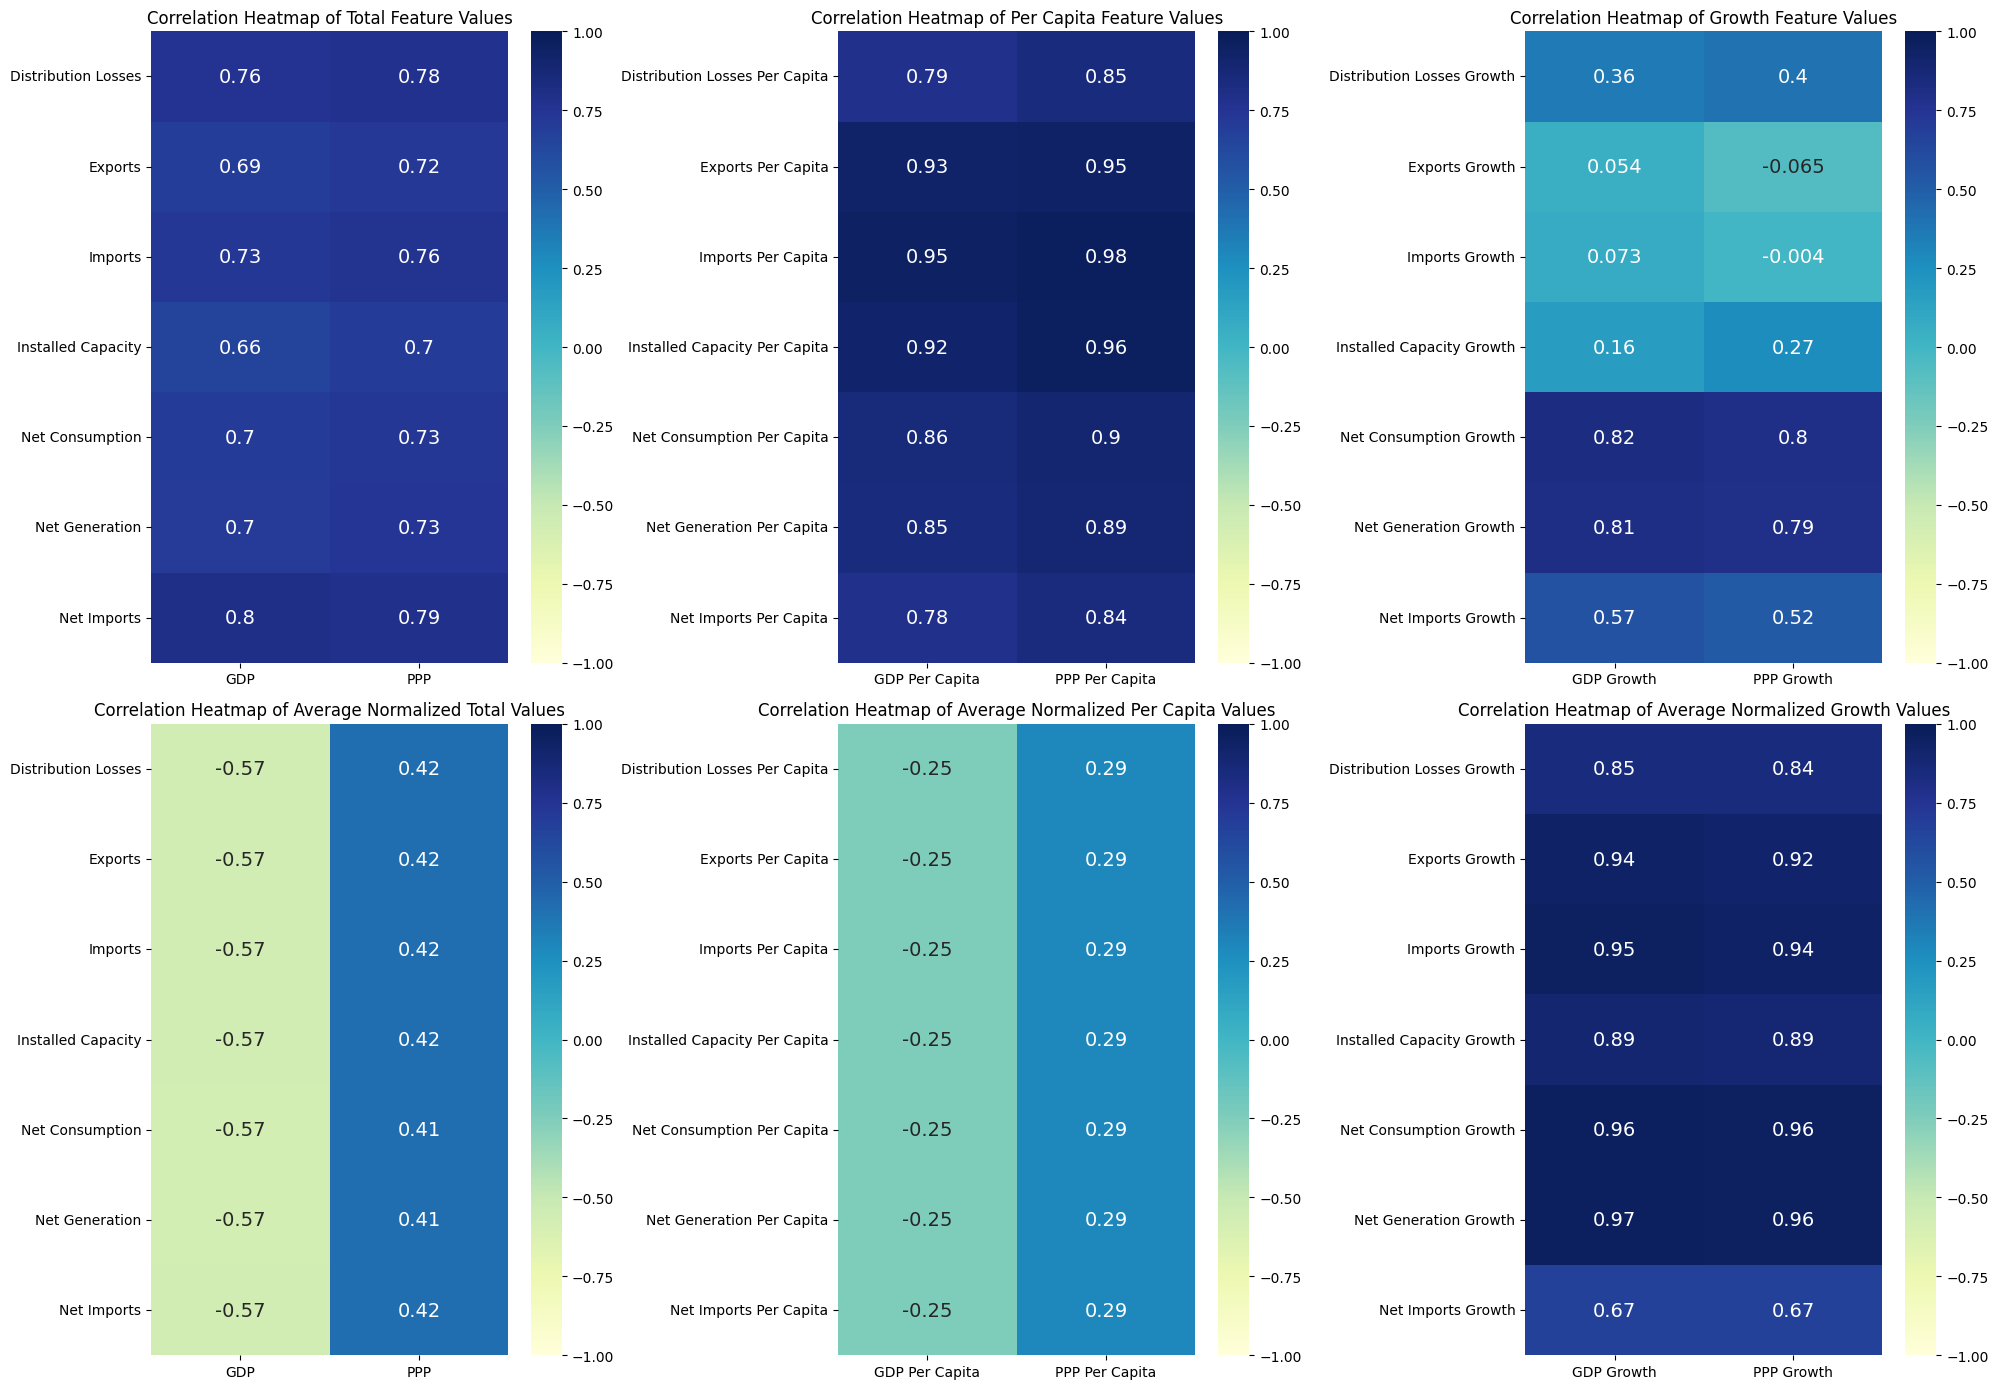

<Figure size 640x480 with 0 Axes>

In [178]:
# 2. Heatmap Analysis
# 2.1 Calculate the total values for each feature across all countries
# Sum the values for each feature independently
total_values = data_cleaned.groupby(level=1).sum()

# Calculate the correlation matrix for total values
correlation_total = total_values.T.corr()

# 2.2 Normalize data for each country to ensure equal weight for all countries
normalized_data = data_cleaned.groupby(level=0).transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate the average values for each feature across all countries after normalization
average_normalized_values = normalized_data.groupby(level=1).mean()

# Calculate the correlation matrix for average normalized values
correlation_average = average_normalized_values.T.corr()

# 2.3 Plot the heatmaps
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Extract different types of features
total_features = [col for col in data_cleaned.index.levels[1] if not ('Per Capita' in col or 'Growth' in col)]
per_capita_features = [col for col in data_cleaned.index.levels[1] if 'Per Capita' in col]
growth_features = [col for col in data_cleaned.index.levels[1] if 'Growth' in col]

# Calculate correlation matrices for total, per capita, and growth features
total_corr = data_cleaned.loc[(slice(None), total_features), :].groupby(level=1).sum().T.corr()
per_capita_corr = data_cleaned.loc[(slice(None), per_capita_features), :].groupby(level=1).sum().T.corr()

gdp_values = data_cleaned.xs('Economics: GDP', level=1)
weights = gdp_values.div(gdp_values.sum(axis=0), axis=1)
growth_weighted_sum = data_cleaned.loc[(slice(None), growth_features), :].mul(weights, level=0).groupby(level=1).sum()
growth_corr = growth_weighted_sum.T.corr()

# Calculate correlation matrices for normalized average values
total_avg_corr = normalized_data.loc[(slice(None), total_features), :].groupby(level=1).mean().T.corr()
per_capita_avg_corr = normalized_data.loc[(slice(None), per_capita_features), :].groupby(level=1).mean().T.corr()
growth_avg_corr = normalized_data.loc[(slice(None), growth_features), :].groupby(level=1).mean().T.corr()

# Custom label function to remove prefixes
def custom_label(label):
    return label.replace('Electricity: ', '').replace('Economics: ', '')

# Plot specific parts of heatmaps
x_subset1 = ['Economics: GDP', 'Economics: PPP']
y_subset1 = ['Electricity: Distribution Losses', 'Electricity: Exports', 'Electricity: Imports', 'Electricity: Installed Capacity', 'Electricity: Net Consumption', 'Electricity: Net Generation', 'Electricity: Net Imports']
sns.heatmap(total_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 0].set_title('Correlation Heatmap of Total Feature Values')

x_subset2 = ['Economics: GDP Per Capita', 'Economics: PPP Per Capita']
y_subset2 = ['Electricity: Distribution Losses Per Capita', 'Electricity: Exports Per Capita', 'Electricity: Imports Per Capita', 'Electricity: Installed Capacity Per Capita', 'Electricity: Net Consumption Per Capita', 'Electricity: Net Generation Per Capita', 'Electricity: Net Imports Per Capita']
sns.heatmap(per_capita_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 1].set_title('Correlation Heatmap of Per Capita Feature Values')

x_subset3 = ['Economics: GDP Growth', 'Economics: PPP Growth']
y_subset3 = ['Electricity: Distribution Losses Growth', 'Electricity: Exports Growth', 'Electricity: Imports Growth', 'Electricity: Installed Capacity Growth', 'Electricity: Net Consumption Growth', 'Electricity: Net Generation Growth', 'Electricity: Net Imports Growth']
sns.heatmap(growth_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[0, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[0, 2].set_title('Correlation Heatmap of Growth Feature Values')

sns.heatmap(total_avg_corr.loc[y_subset1, x_subset1].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 0], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 0].set_title('Correlation Heatmap of Average Normalized Total Values')

sns.heatmap(per_capita_avg_corr.loc[y_subset2, x_subset2].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 1], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 1].set_title('Correlation Heatmap of Average Normalized Per Capita Values')

sns.heatmap(growth_avg_corr.loc[y_subset3, x_subset3].rename(index=custom_label, columns=custom_label), annot=True, cmap='YlGnBu', ax=axes[1, 2], vmin=-1, vmax=1, annot_kws={"size": 14})
axes[1, 2].set_title('Correlation Heatmap of Average Normalized Growth Values')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Heatmap</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    Since my goal is to discuss the correlation between electricity data and economic data, I only retained the relevant parts of the heatmap. The first three figures show the correlation of total global values, while the latter three represent the mean of globally normalized data, preventing the dominance of major countries.
    
  <p style="color: #34495e; line-height: 1.6;">
    In subplot 1, 2, and 6, we can clearly see the strong positive correlation between economic data and electricity data, indicating that our initial hypothesis is supported by the data.

  <p style="color: #34495e; line-height: 1.6;">
    Comparing subplot 1 and 4, as well as subplot 2 and 5, the correlation weakens after normalization, and GDP even turns into a negative correlation. This suggests that while major global economies show a positive correlation between economic data and electricity, many countries do not follow this pattern.

  <p style="color: #34495e; line-height: 1.6;">
    Observing subplot 6, we find that most countries exhibit synchronous growth between economic growth and electricity data. However, the relatively low correlation for net imports growth indicates differences in strategies among countries, specifically regarding whether they choose to export or import electricity, but this does not affect electricity consumption itself.

  <p style="color: #34495e; line-height: 1.6;">
    In subplot 3, only direct data related to electricity usage, such as net consumption and net generation, shows a strong correlation with economic growth. In contrast, indirect data or non-primary data such as imports and exports growth, distribution losses, and installed capacity show weaker correlations. These indirect factors are likely influenced by other variables, and different results may emerge over a longer time frame.
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

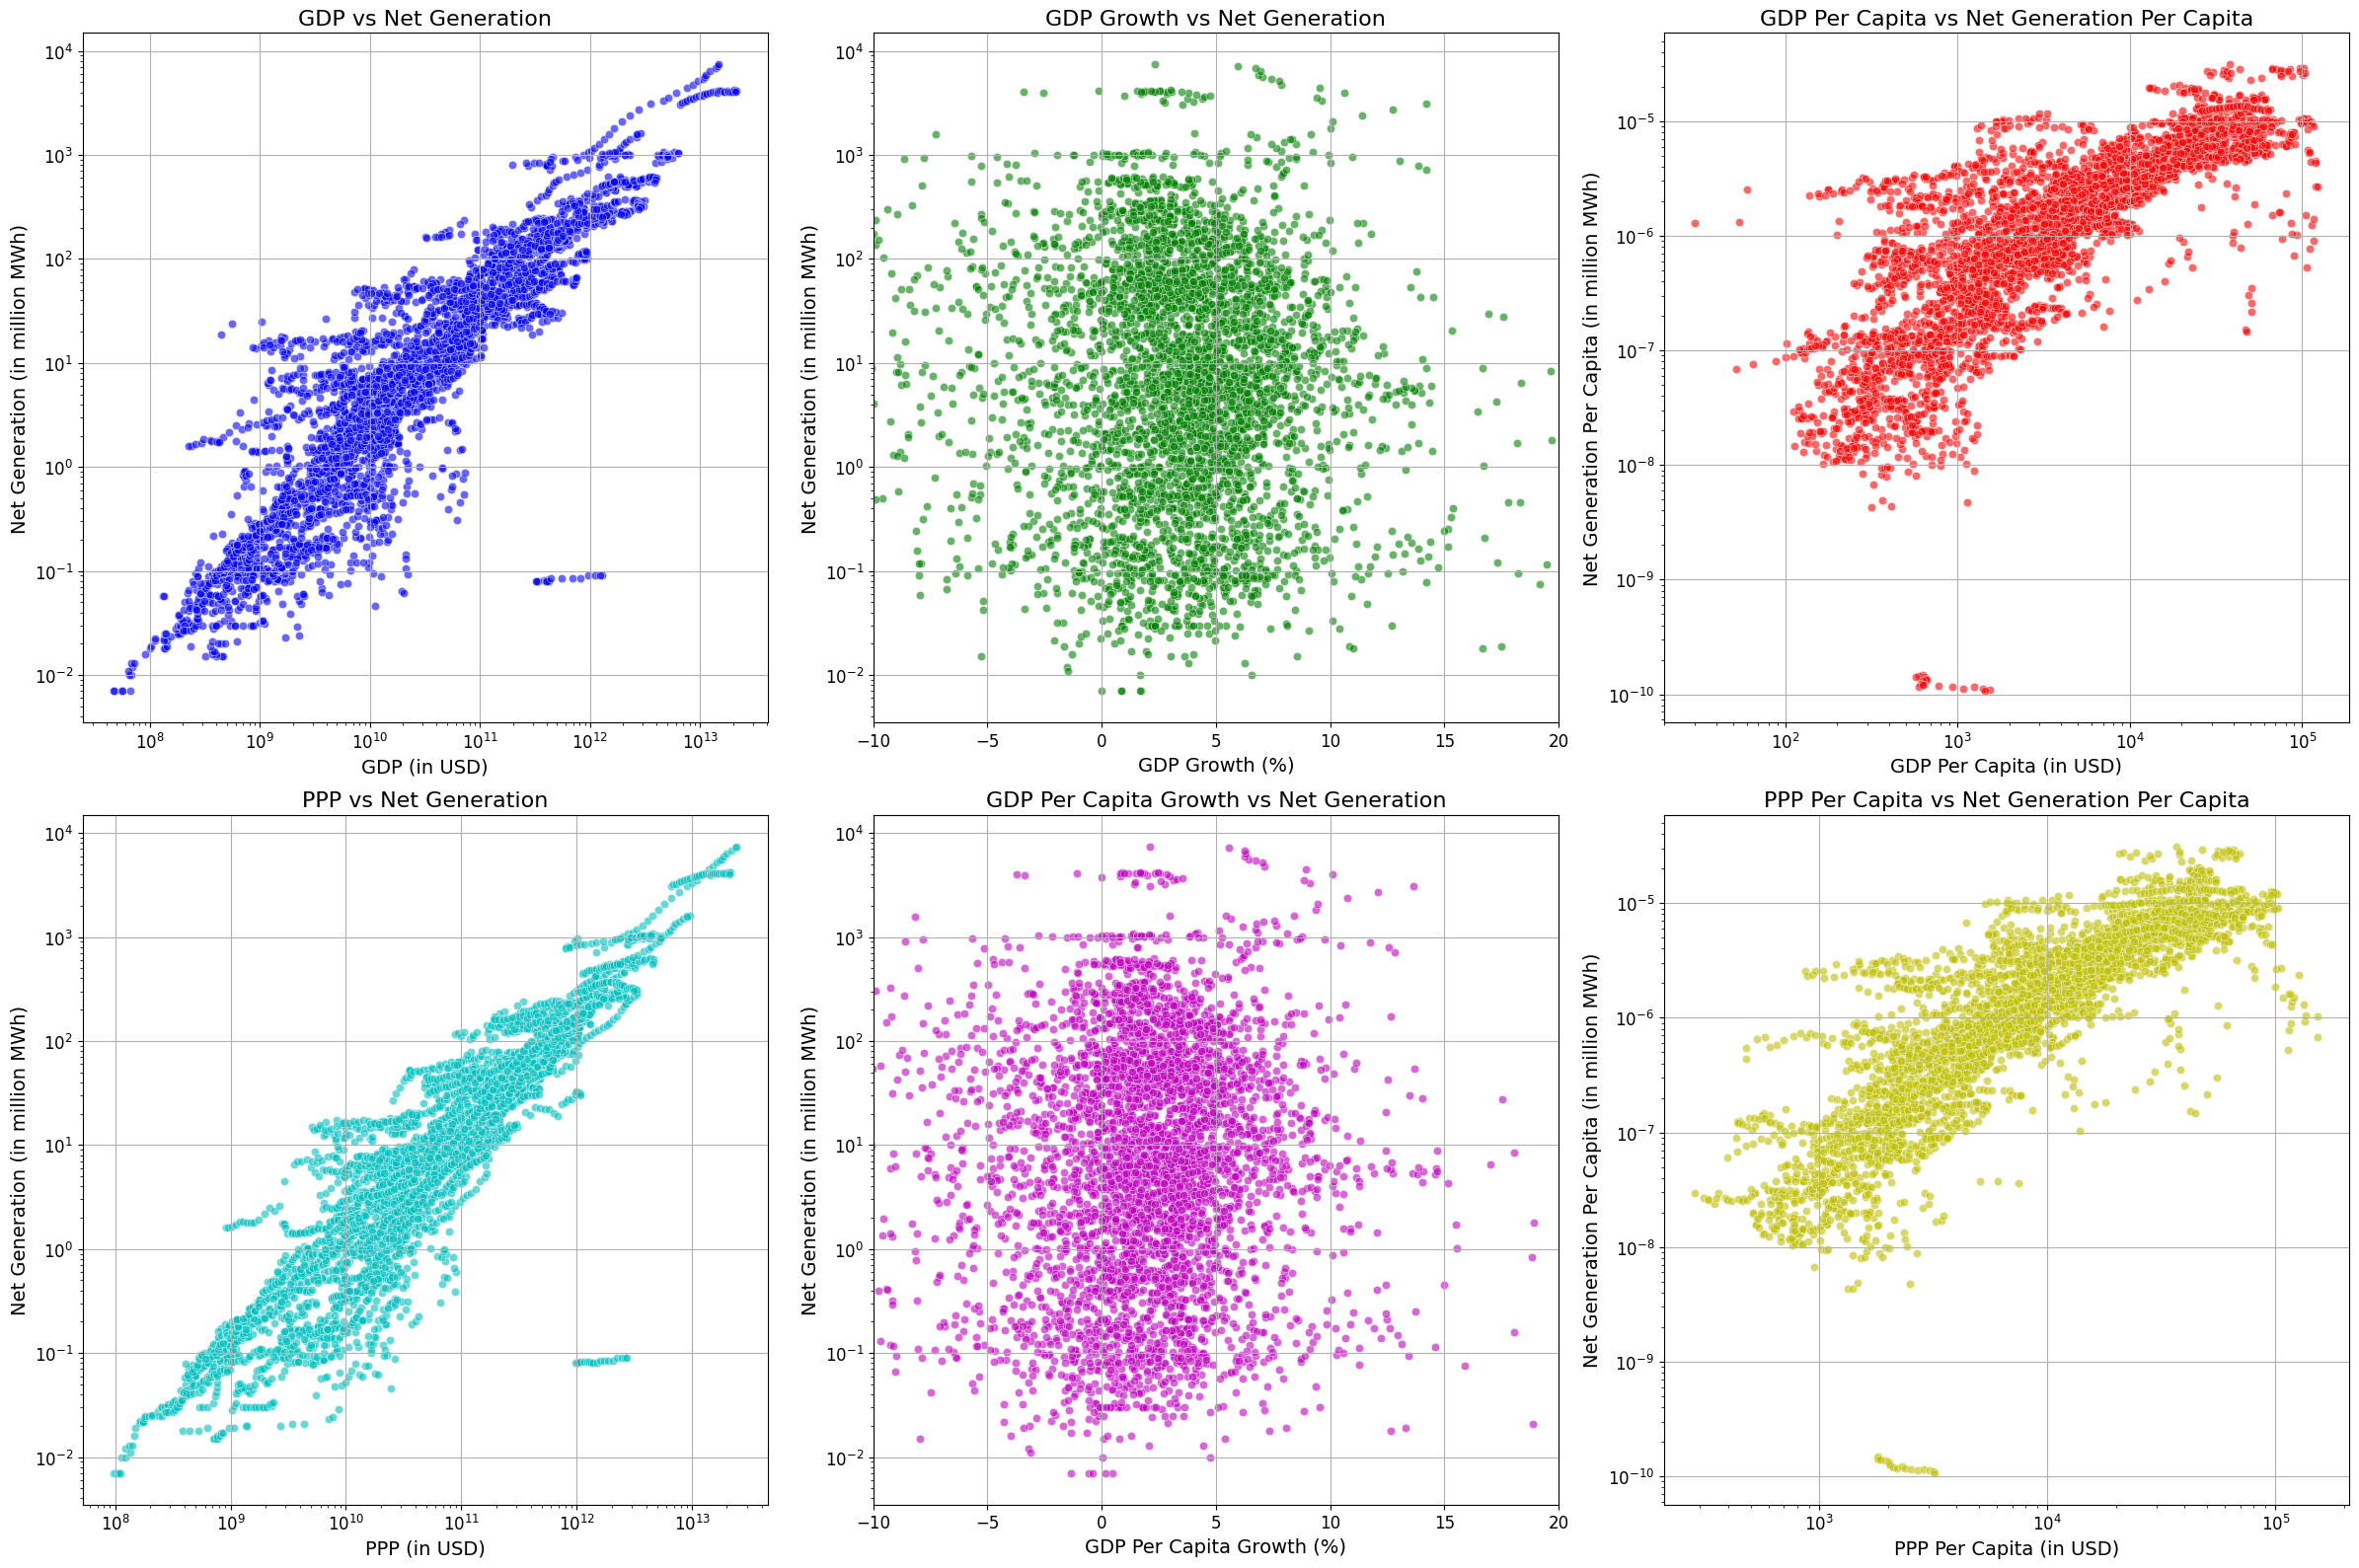

In [135]:
# 3. Scatter Plot Analysis
# Calculate population for each year by using the GDP and GDP per capita for each country and year
population = data_cleaned.xs('Economics: GDP', level=1) / data_cleaned.xs('Economics: GDP Per Capita', level=1)

# Calculate net generation per capita for each year
net_generation_per_capita = data_cleaned.xs('Electricity: Net Generation', level=1) / population

# Plotting scatter plots for the relationships specified
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

# Scatter plot 1: GDP vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: GDP'), :].values.flatten(),
    y=data_cleaned.loc[(slice(None), 'Electricity: Net Generation'), :].values.flatten(),
    ax=axes[0, 0],
    color='b',
    alpha=0.6
)
axes[0, 0].set_title('GDP vs Net Generation', fontsize=16)
axes[0, 0].set_xlabel('GDP (in USD)', fontsize=14)
axes[0, 0].set_ylabel('Net Generation (in million MWh)', fontsize=14)
axes[0, 0].grid(True)
axes[0, 0].set_xscale('log')  # Set x-axis to log scale
axes[0, 0].set_yscale('log')  # Set y-axis to log scale
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Scatter plot 2: GDP Growth vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: GDP Growth'), :].values.flatten(),
    y=data_cleaned.loc[(slice(None), 'Electricity: Net Generation'), :].values.flatten(),
    ax=axes[0, 1],
    color='g',
    alpha=0.6
)
axes[0, 1].set_title('GDP Growth vs Net Generation', fontsize=16)
axes[0, 1].set_xlabel('GDP Growth (%)', fontsize=14)
axes[0, 1].set_ylabel('Net Generation (in million MWh)', fontsize=14)
axes[0, 1].grid(True)
axes[0, 1].set_xlim(-10, 20)
# axes[0, 1].set_xscale('log')  # Set x-axis to log scale
axes[0, 1].set_yscale('log')  # Set y-axis to log scale
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Scatter plot 3: GDP Per Capita vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: GDP Per Capita'), :].values.flatten(),
    y=net_generation_per_capita.values.flatten(),
    ax=axes[0, 2],
    color='r',
    alpha=0.6
)
axes[0, 2].set_title('GDP Per Capita vs Net Generation Per Capita', fontsize=16)
axes[0, 2].set_xlabel('GDP Per Capita (in USD)', fontsize=14)
axes[0, 2].set_ylabel('Net Generation Per Capita (in million MWh)', fontsize=14)
axes[0, 2].grid(True)
axes[0, 2].set_xscale('log')  # Set x-axis to log scale
axes[0, 2].set_yscale('log')  # Set y-axis to log scale
axes[0, 2].tick_params(axis='both', which='major', labelsize=12)

# Scatter plot 4: PPP vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: PPP'), :].values.flatten(),
    y=data_cleaned.loc[(slice(None), 'Electricity: Net Generation'), :].values.flatten(),
    ax=axes[1, 0],
    color='c',
    alpha=0.6
)
axes[1, 0].set_title('PPP vs Net Generation', fontsize=16)
axes[1, 0].set_xlabel('PPP (in USD)', fontsize=14)
axes[1, 0].set_ylabel('Net Generation (in million MWh)', fontsize=14)
axes[1, 0].grid(True)
axes[1, 0].set_xscale('log')  # Set x-axis to log scale
axes[1, 0].set_yscale('log')  # Set y-axis to log scale
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Scatter plot 5: GDP Per Capita Growth vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: GDP Per Capita Growth'), :].values.flatten(),
    y=data_cleaned.loc[(slice(None), 'Electricity: Net Generation'), :].values.flatten(),
    ax=axes[1, 1],
    color='m',
    alpha=0.6
)
axes[1, 1].set_title('GDP Per Capita Growth vs Net Generation', fontsize=16)
axes[1, 1].set_xlabel('GDP Per Capita Growth (%)', fontsize=14)
axes[1, 1].set_ylabel('Net Generation (in million MWh)', fontsize=14)
axes[1, 1].grid(True)
axes[1, 1].set_xlim(-10, 20)
axes[1, 1].set_yscale('log')  # Set y-axis to log scale
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Scatter plot 6: PPP Per Capita vs Net Generation
sns.scatterplot(
    x=data_cleaned.loc[(slice(None), 'Economics: PPP Per Capita'), :].values.flatten(),
    y=net_generation_per_capita.values.flatten(),
    ax=axes[1, 2],
    color='y',
    alpha=0.6
)
axes[1, 2].set_title('PPP Per Capita vs Net Generation Per Capita', fontsize=16)
axes[1, 2].set_xlabel('PPP Per Capita (in USD)', fontsize=14)
axes[1, 2].set_ylabel('Net Generation Per Capita (in million MWh)', fontsize=14)
axes[1, 2].grid(True)
axes[1, 2].set_xscale('log')  # Set x-axis to log scale
axes[1, 2].set_yscale('log')  # Set y-axis to log scale
axes[1, 2].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()